In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [213]:
df = pd.read_csv('StudentPerformanceFactors.csv')

print("Dataset Info:")
df.info()
print("\nMissing values:", df.isnull().sum().sum())
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [214]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing values: {(missing_values.sum() / (len(data) * len(df.columns))) * 100:.2f}%")

Missing Values:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

Total missing values: 235
Percentage of missing values: 0.18%


In [215]:
# Examine categorical variables
print("Categorical Variables Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n")
    print(data[col].value_counts())
    print(f"Unique values: {data[col].nunique()}")

Categorical Variables Summary:


Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Unique values: 3


Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Unique values: 3


Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Unique values: 2


Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Unique values: 3


Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Unique values: 2


Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Unique values: 3


Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64
Unique values: 3


School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Unique values: 2


Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
Unique values: 3


Learning_Disabilities
No     5912
Yes     695
Na

In [216]:
# Handle missing values
print("Handling missing values...")

# For categorical variables with missing values, fill with mode
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    if col in df.columns and data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_value}")

# Verify no missing values remain
print("\nMissing values after cleaning:")
remaining_missing = df.isnull().sum()
print(remaining_missing[remaining_missing > 0])
if remaining_missing.sum() == 0:
    print("✓ All missing values handled successfully!")

Handling missing values...

Missing values after cleaning:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


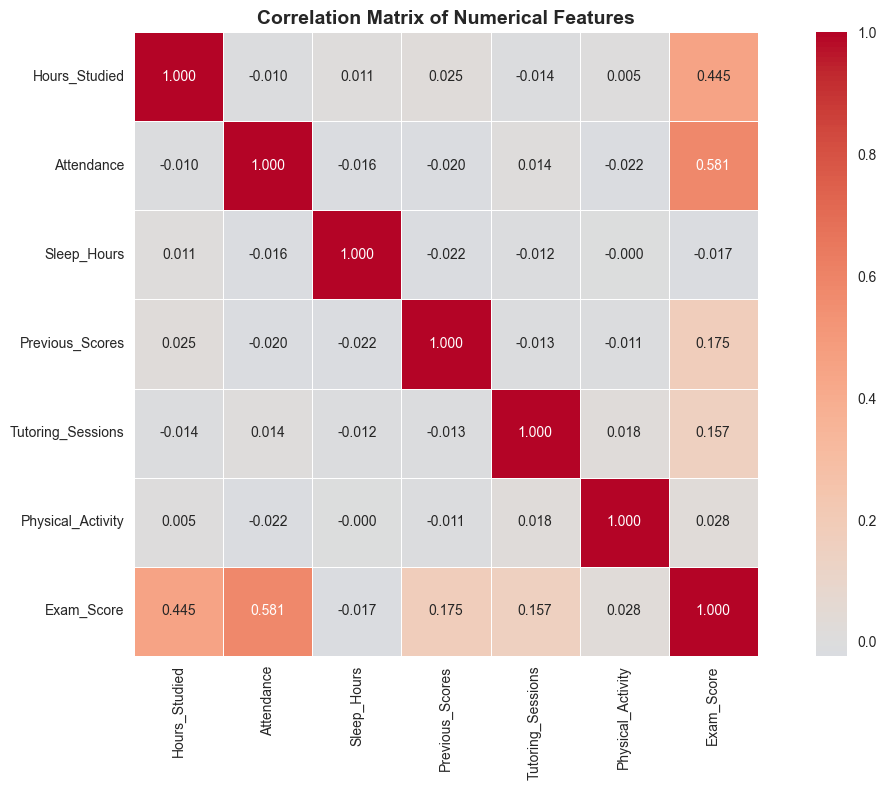

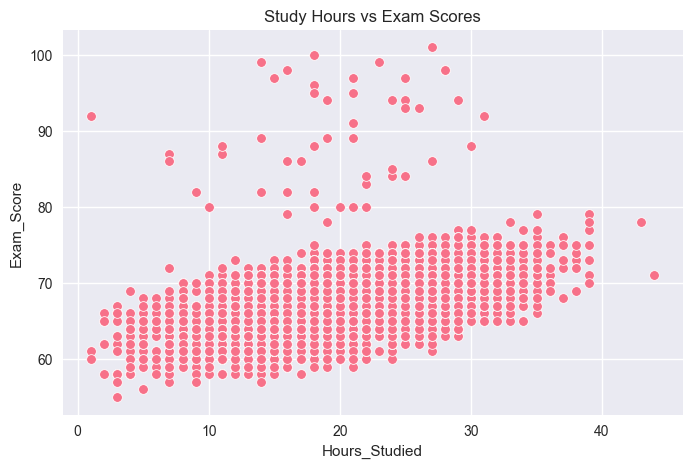

In [217]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
numerical_data = data[numerical_cols]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Study Hours vs Exam Scores')
plt.show()

In [218]:
# Create a copy of the data for preprocessing
data_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_features = data_processed.select_dtypes(include=['object']).columns

for feature in categorical_features:
    le = LabelEncoder()
    data_processed[feature] = le.fit_transform(data_processed[feature])
    label_encoders[feature] = le
    print(f"✓ {feature}: {len(le.classes_)} unique values")



✓ Parental_Involvement: 3 unique values
✓ Access_to_Resources: 3 unique values
✓ Extracurricular_Activities: 2 unique values
✓ Motivation_Level: 3 unique values
✓ Internet_Access: 2 unique values
✓ Family_Income: 3 unique values
✓ Teacher_Quality: 4 unique values
✓ School_Type: 2 unique values
✓ Peer_Influence: 3 unique values
✓ Learning_Disabilities: 2 unique values
✓ Parental_Education_Level: 4 unique values
✓ Distance_from_Home: 4 unique values
✓ Gender: 2 unique values


In [219]:
# Define features and target
X_simple = data_processed[['Hours_Studied']]  # Simple model with just study hours
X_full = data_processed.drop('Exam_Score', axis=1)  # Full model with all features
y = data_processed['Exam_Score']

X_simple_train, X_simple_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

X_full_train, X_full_test, _, _ = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

In [220]:
# Train linear regression model (simple model with Hours_Studied only)
lr_simple = LinearRegression()
lr_simple.fit(X_simple_train, y_train)

# Make predictions
y_pred_simple = lr_simple.predict(X_simple_test)

# Print model parameters
print("Simple Linear Regression Model (Hours_Studied Only):")
print(f"Coefficient (slope): {lr_simple.coef_[0]:.3f}")
print(f"Intercept: {lr_simple.intercept_:.3f}")
print(f"Equation: Exam Score = {lr_simple.intercept_:.3f} + {lr_simple.coef_[0]:.3f} * Hours_Studied")

Simple Linear Regression Model (Hours_Studied Only):
Coefficient (slope): 0.286
Intercept: 61.511
Equation: Exam Score = 61.511 + 0.286 * Hours_Studied


In [221]:
# Calculate evaluation metrics for simple model
mse_simple = mean_squared_error(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)

print("Simple Linear Regression Performance:")
print(f"R² Score: {r2_simple:.4f}")
print(f"Mean Squared Error (MSE): {mse_simple:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:.4f}")
print(f"Mean Absolute Error (MAE): {mae_simple:.4f}")
print(f"\nModel explains {r2_simple*100:.2f}% of the variance in exam scores")

Simple Linear Regression Performance:
R² Score: 0.2320
Mean Squared Error (MSE): 10.8559
Root Mean Squared Error (RMSE): 3.2948
Mean Absolute Error (MAE): 2.4476

Model explains 23.20% of the variance in exam scores


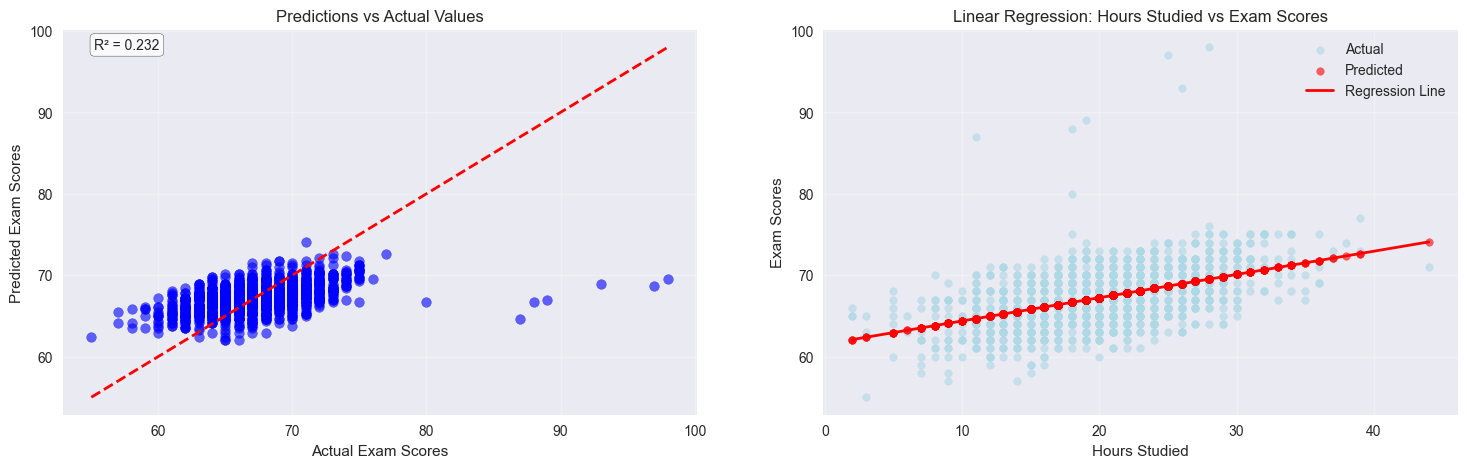

In [222]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# 1. Scatter plot of predictions vs actual
axes[0].scatter(y_test, y_pred_simple, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Exam Scores')
axes[0].set_ylabel('Predicted Exam Scores')
axes[0].set_title('Predictions vs Actual Values')
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r2_simple:.3f}', transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Regression line with data points
axes[1].scatter(X_simple_test, y_test, alpha=0.6, color='lightblue', label='Actual', s=30)
axes[1].scatter(X_simple_test, y_pred_simple, alpha=0.6, color='red', label='Predicted', s=30)
# Sort for line plotting
sort_idx = np.argsort(X_simple_test.values.flatten())
axes[1].plot(X_simple_test.values.flatten()[sort_idx], y_pred_simple[sort_idx], 
             color='red', linewidth=2, label='Regression Line')
axes[1].set_xlabel('Hours Studied')
axes[1].set_ylabel('Exam Scores')
axes[1].set_title('Linear Regression: Hours Studied vs Exam Scores')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.show()

In [223]:
# Try polynomial regression with different degrees
degrees = [2, 3, 4]
poly_results = {}

for degree in degrees:
    # Create polynomial features
    poly_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    # Train the model
    poly_pipeline.fit(X_simple_train, y_train)
    
    # Make predictions
    y_pred_poly = poly_pipeline.predict(X_simple_test)
    
    # Calculate metrics
    r2_poly = r2_score(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    
    poly_results[degree] = {
        'model': poly_pipeline,
        'predictions': y_pred_poly,
        'r2': r2_poly,
        'mse': mse_poly,
        'mae': mae_poly
    }
    
    print(f"Polynomial Regression (degree {degree}):")
    print(f"  R² Score: {r2_poly:.4f}")
    print(f"  MSE: {mse_poly:.4f}")
    print(f"  MAE: {mae_poly:.4f}")

Polynomial Regression (degree 2):
  R² Score: 0.2328
  MSE: 10.8450
  MAE: 2.4448
Polynomial Regression (degree 3):
  R² Score: 0.2328
  MSE: 10.8438
  MAE: 2.4445
Polynomial Regression (degree 4):
  R² Score: 0.2317
  MSE: 10.8607
  MAE: 2.4455


In [224]:
# Compare all models
print("Model Performance Comparison:")
print(f"Linear Regression:        R² = {r2_simple:.4f}, MSE = {mse_simple:.4f}")
for degree in degrees:
    r2 = poly_results[degree]['r2']
    mse = poly_results[degree]['mse']
    print(f"Polynomial (degree {degree}):     R² = {r2:.4f}, MSE = {mse:.4f}")

# Find best polynomial model
best_degree = max(degrees, key=lambda d: poly_results[d]['r2'])
print(f"\nBest polynomial model: degree {best_degree} with R² = {poly_results[best_degree]['r2']:.4f}")

Model Performance Comparison:
Linear Regression:        R² = 0.2320, MSE = 10.8559
Polynomial (degree 2):     R² = 0.2328, MSE = 10.8450
Polynomial (degree 3):     R² = 0.2328, MSE = 10.8438
Polynomial (degree 4):     R² = 0.2317, MSE = 10.8607

Best polynomial model: degree 3 with R² = 0.2328


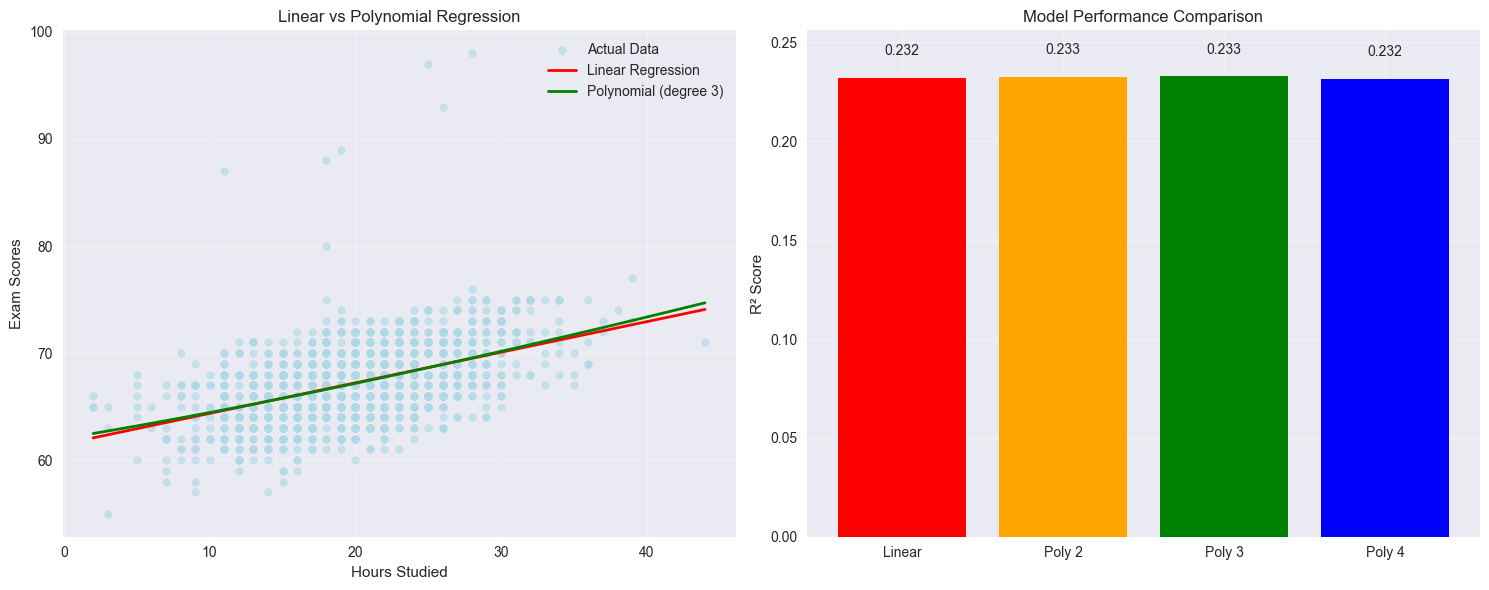

In [225]:
# Visualize polynomial regression results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Compare linear vs best polynomial
x_range = np.linspace(X_simple_test.min().values[0], X_simple_test.max().values[0], 100).reshape(-1, 1)
y_linear_range = lr_simple.predict(x_range)
y_poly_range = poly_results[best_degree]['model'].predict(x_range)

axes[0].scatter(X_simple_test, y_test, alpha=0.6, color='lightblue', label='Actual Data', s=30)
axes[0].plot(x_range, y_linear_range, color='red', linewidth=2, label='Linear Regression')
axes[0].plot(x_range, y_poly_range, color='green', linewidth=2, label=f'Polynomial (degree {best_degree})')
axes[0].set_xlabel('Hours Studied')
axes[0].set_ylabel('Exam Scores')
axes[0].set_title('Linear vs Polynomial Regression')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: R² comparison
model_names = ['Linear'] + [f'Poly {d}' for d in degrees]
r2_scores = [r2_simple] + [poly_results[d]['r2'] for d in degrees]

bars = axes[1].bar(model_names, r2_scores, color=['red', 'orange', 'green', 'blue'])
axes[1].set_ylabel('R² Score')
axes[1].set_title('Model Performance Comparison')
axes[1].set_ylim(0, max(r2_scores) * 1.1)
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [226]:
# Train models with different feature combinations
feature_combinations = {
    'Hours Studied Only': ['Hours_Studied'],
    'Study + Sleep': ['Hours_Studied', 'Sleep_Hours'],
    'Study + Attendance': ['Hours_Studied', 'Attendance'],
    'Study + Previous': ['Hours_Studied', 'Previous_Scores'],
    'Study + Tutoring': ['Hours_Studied', 'Tutoring_Sessions'],
    'Top 5 Numerical': ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions'],
    'All Features': list(X_full.columns)
}

feature_results = {}

for name, features in feature_combinations.items():
    # Prepare data
    X_combo = data_processed[features]
    X_combo_train, X_combo_test, _, _ = train_test_split(
        X_combo, y, test_size=0.2, random_state=42
    )
    
    # Train model
    lr_combo = LinearRegression()
    lr_combo.fit(X_combo_train, y_train)
    
    # Make predictions
    y_pred_combo = lr_combo.predict(X_combo_test)
    
    # Calculate metrics
    r2_combo = r2_score(y_test, y_pred_combo)
    mse_combo = mean_squared_error(y_test, y_pred_combo)
    mae_combo = mean_absolute_error(y_test, y_pred_combo)
    
    feature_results[name] = {
        'features': features,
        'model': lr_combo,
        'predictions': y_pred_combo,
        'r2': r2_combo,
        'mse': mse_combo,
        'mae': mae_combo
    }
    
    print(f"{name}:")
    print(f"  Features ({len(features)}): {features[:3]}{'...' if len(features) > 3 else ''}")
    print(f"  R² Score: {r2_combo:.4f}")
    print(f"  MSE: {mse_combo:.4f}")
    print(f"  MAE: {mae_combo:.4f}")
    print()

Hours Studied Only:
  Features (1): ['Hours_Studied']
  R² Score: 0.2320
  MSE: 10.8559
  MAE: 2.4476

Study + Sleep:
  Features (2): ['Hours_Studied', 'Sleep_Hours']
  R² Score: 0.2290
  MSE: 10.8983
  MAE: 2.4532

Study + Attendance:
  Features (2): ['Hours_Studied', 'Attendance']
  R² Score: 0.5890
  MSE: 5.8091
  MAE: 1.4690

Study + Previous:
  Features (2): ['Hours_Studied', 'Previous_Scores']
  R² Score: 0.2541
  MSE: 10.5438
  MAE: 2.4073

Study + Tutoring:
  Features (2): ['Hours_Studied', 'Tutoring_Sessions']
  R² Score: 0.2565
  MSE: 10.5100
  MAE: 2.3942

Top 5 Numerical:
  Features (5): ['Hours_Studied', 'Previous_Scores', 'Attendance']...
  R² Score: 0.6408
  MSE: 5.0771
  MAE: 1.2751

All Features:
  Features (19): ['Hours_Studied', 'Attendance', 'Parental_Involvement']...
  R² Score: 0.6886
  MSE: 4.4014
  MAE: 1.0157



In [227]:
# Find and analyze the best model
best_model_name = max(feature_results.keys(), key=lambda k: feature_results[k]['r2'])
best_model = feature_results[best_model_name]['model']
best_features = feature_results[best_model_name]['features']

print(f"Best model: {best_model_name}")
print(f"R² Score: {feature_results[best_model_name]['r2']:.4f}")
print(f"Number of features: {len(best_features)}")

# Feature importance (coefficients) for best model
if len(best_features) > 1:
    print("\nFeature Coefficients (Top 10):")
    coefficients = best_model.coef_
    feature_importance = list(zip(best_features, coefficients))
    feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)
    
    for i, (feature, coef) in enumerate(feature_importance[:10]):
        print(f"  {i+1:2d}. {feature:<25}: {coef:>8.3f}")
    print(f"      Intercept{'':<25}: {best_model.intercept_:>8.3f}")

Best model: All Features
R² Score: 0.6886
Number of features: 19

Feature Coefficients (Top 10):
   1. Internet_Access          :    0.968
   2. Learning_Disabilities    :   -0.877
   3. Extracurricular_Activities:    0.567
   4. Peer_Influence           :    0.535
   5. Tutoring_Sessions        :    0.502
   6. Parental_Involvement     :   -0.445
   7. Distance_from_Home       :    0.442
   8. Access_to_Resources      :   -0.404
   9. Hours_Studied            :    0.289
  10. Teacher_Quality          :   -0.231
      Intercept                         :   40.147


In [228]:
# Create comprehensive model comparison
comparison_data = []

# Add simple linear regression
comparison_data.append({
    'Model': 'Linear (Hours Studied)',
    'Type': 'Linear',
    'Features': 1,
    'R²': r2_simple,
    'MSE': mse_simple,
    'MAE': mae_simple
})

# Add polynomial models
for degree in degrees:
    comparison_data.append({
        'Model': f'Polynomial (degree {degree})',
        'Type': 'Polynomial',
        'Features': 1,
        'R²': poly_results[degree]['r2'],
        'MSE': poly_results[degree]['mse'],
        'MAE': poly_results[degree]['mae']
    })

# Add feature combination models
for name, results in feature_results.items():
    if name != 'Hours Studied Only':  # Avoid duplicate
        comparison_data.append({
            'Model': name,
            'Type': 'Multi-feature',
            'Features': len(results['features']),
            'R²': results['r2'],
            'MSE': results['mse'],
            'MAE': results['mae']
        })

# Create comparison DataFrame
comparison_data = pd.DataFrame(comparison_data)
comparison_data = comparison_data.sort_values('R²', ascending=False)

print("Complete Model Performance Comparison:")
print("=" * 90)
print(f"{'Model':<25} {'Type':<12} {'Features':<8} {'R²':<8} {'MSE':<8} {'MAE':<8}")
print("=" * 90)
for idx, row in comparison_data.iterrows():
    print(f"{row['Model']:<25} {row['Type']:<12} {row['Features']:<8} {row['R²']:<8.4f} {row['MSE']:<8.2f} {row['MAE']:<8.2f}")

print("\n🏆 Best performing model:")
best_row = comparison_data.iloc[0]
print(f"Model: {best_row['Model']}")
print(f"R² Score: {best_row['R²']:.4f}")
print(f"Number of features: {best_row['Features']}")

Complete Model Performance Comparison:
Model                     Type         Features R²       MSE      MAE     
All Features              Multi-feature 19       0.6886   4.40     1.02    
Top 5 Numerical           Multi-feature 5        0.6408   5.08     1.28    
Study + Attendance        Multi-feature 2        0.5890   5.81     1.47    
Study + Tutoring          Multi-feature 2        0.2565   10.51    2.39    
Study + Previous          Multi-feature 2        0.2541   10.54    2.41    
Polynomial (degree 3)     Polynomial   1        0.2328   10.84    2.44    
Polynomial (degree 2)     Polynomial   1        0.2328   10.84    2.44    
Linear (Hours Studied)    Linear       1        0.2320   10.86    2.45    
Polynomial (degree 4)     Polynomial   1        0.2317   10.86    2.45    
Study + Sleep             Multi-feature 2        0.2290   10.90    2.45    

🏆 Best performing model:
Model: All Features
R² Score: 0.6886
Number of features: 19
